### Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

The company wants to know:
 -	Which variables are significant in predicting the price of a car
 -	How well those variables describe the price of a car
 
#### Business Goal
Need to model the price of cars with the available independent variables

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

In [4]:
import chardet

##### Utility methods

In [5]:
def train_model(X, y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit() 
    print(lm.summary())
    return X

In [6]:
def calculate_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [7]:
def find_encoding(fname):
    r_file = open(fname, 'rb').read()
    result = chardet.detect(r_file)
    charenc = result['encoding']
    return charenc

print(find_encoding('CarPrice_Assignment.csv'))

ascii


### 1. Read the data
    - Read the data
    - clean the data

In [8]:
df_cars = pd.read_csv('CarPrice_Assignment.csv')

In [9]:
df_cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
df_cars.shape

(205, 26)

In [11]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [12]:
df_cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Data Preparation

 - There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 

In [13]:
# split the carName to CarMake and model and return CarMake

def carNameToCarMake(x):
    if " " in x:
        return x.split(" ", 1)[0]
    return x

In [14]:
def correctCarMake(x):
    spellMap =  {
         "vw":"volkswagen",
         "vokswagen":"volkswagen",
         "toyouta":"toyota", 
         "porcshce":"porsche", 
         "maxda":"mazda"
    }
    if x in spellMap:
        return spellMap[x]
    return x        

In [15]:
# Conver to lowercase for consistency
df_cars['CarName'] = df_cars['CarName'].str.lower()

In [16]:
pd.unique(df_cars.CarName)

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu mu-x', 'isuzu d-max ',
       'isuzu d-max v-cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [17]:
df_cars['CarName'] = df_cars['CarName'].map(carNameToCarMake)

In [18]:
df_cars['CarName'] = df_cars['CarName'].map(correctCarMake)

In [19]:
##### CarId is an unnecessary column, lets remove that
df_cars.drop(labels=['car_ID'], axis=1, inplace=True)

In [20]:
df_cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [21]:
df_cars.shape

(205, 25)

## 2. Visualize the data / Exploratory Data Analysis

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [22]:
colList = list(df_cars.columns)

In [23]:
print(colList, len(colList))

['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'] 25


In [24]:
cat_vars = ['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
            'enginetype', 'cylindernumber','fuelsystem']

print(cat_vars, len(cat_vars))

['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'] 11


In [25]:
non_cat_vars = list(set(colList)-set(cat_vars)-set(['price']))
print(non_cat_vars, len(non_cat_vars))

['highwaympg', 'citympg', 'carwidth', 'boreratio', 'horsepower', 'stroke', 'wheelbase', 'peakrpm', 'carheight', 'carlength', 'enginesize', 'curbweight', 'compressionratio'] 13


In [26]:
dependent_var = ['price']

##### Visualize price - univariate Analysis

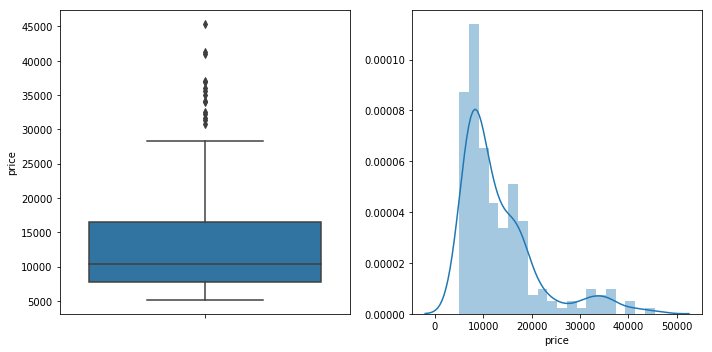

In [27]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=df_cars.price)

plt.subplot(1,2,2)
sns.distplot(df_cars.price, bins=20)

plt.tight_layout()

In [28]:
cat_vars

['symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [29]:
df_fuelsystem = pd.DataFrame(df_cars.groupby(['fuelsystem'])['price'].mean().sort_values(ascending = False))

In [30]:
df_cylinders = pd.DataFrame(df_cars.groupby(['cylindernumber'])['price'].mean().sort_values(ascending = False))

In [31]:
df_enginetype = pd.DataFrame(df_cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))

In [32]:
df_eng_loc = pd.DataFrame(df_cars.groupby(['enginelocation'])['price'].mean().sort_values(ascending = False))

In [33]:
df_drivewheel = pd.DataFrame(df_cars.groupby(['drivewheel'])['price'].mean().sort_values(ascending = False))

In [34]:
df_aspiration = pd.DataFrame(df_cars.groupby(['aspiration'])['price'].mean().sort_values(ascending = False))

In [35]:
df_symboling = pd.DataFrame(df_cars.groupby(['symboling'])['price'].mean().sort_values(ascending = False))

In [36]:
df_carname = pd.DataFrame(df_cars.groupby(['CarName'])['price'].mean().sort_values(ascending = False))

In [37]:
df_fueltype = pd.DataFrame(df_cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))

In [38]:
df_carbody = pd.DataFrame(df_cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))

In [39]:
df_doornumber = pd.DataFrame(df_cars.groupby(['doornumber'])['price'].mean().sort_values(ascending = False))

#### Visualize Numerical Data

In [40]:
non_cat_vars.sort()
print(non_cat_vars, len(non_cat_vars))

['boreratio', 'carheight', 'carlength', 'carwidth', 'citympg', 'compressionratio', 'curbweight', 'enginesize', 'highwaympg', 'horsepower', 'peakrpm', 'stroke', 'wheelbase'] 13


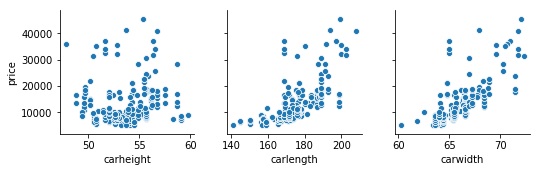

In [41]:
sns.pairplot(df_cars, x_vars=['carheight', 'carlength', 'carwidth'], y_vars=dependent_var)

In [42]:
print('Correlation between price and carHeight = ', round(np.corrcoef(df_cars.price, df_cars.carheight)[0,1],2))
print('Correlation between price and carwidth = ', round(np.corrcoef(df_cars.price, df_cars.carwidth)[0,1],2))
print('Correlation between price and carLenght = ', round(np.corrcoef(df_cars.price, df_cars.carlength)[0,1],2))

Correlation between price and carHeight =  0.12
Correlation between price and carwidth =  0.76
Correlation between price and carLenght =  0.68


##### Inferences
- carlenght and carwidth has positive correlation with the price
- carheight appears not to have any correlation with price

- We may ignore <b>carheight</b> for the modelling analysis

In [43]:
ignored_x_features = ['carheight']

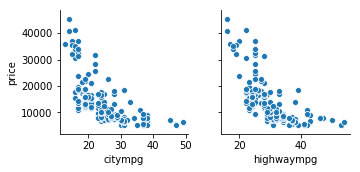

In [44]:
sns.pairplot(df_cars, x_vars=['citympg', 'highwaympg',], y_vars=dependent_var)

In [45]:
print('Correlation between price and citympg = ', np.corrcoef(df_cars.price, df_cars.citympg)[0,1])
print('Correlation between price and highwaympg = ', np.corrcoef(df_cars.price, df_cars.highwaympg)[0,1])
print('Correlation between citympg and highwaympg = ', np.corrcoef(df_cars.citympg, df_cars.highwaympg)[0,1])

Correlation between price and citympg =  -0.68575133602704
Correlation between price and highwaympg =  -0.6975990916465566
Correlation between citympg and highwaympg =  0.9713370423425061


##### Inference
- Both citympg and highwaympg has negative correlation with price
- Correlation coefficient bwetween city and highway mpg is very high

 <b>Chance for derived variable, lets consider 70% city and 30% higway fuel efficieny and create new fuel efficiency variable</b>

In [46]:
df_cars['fuelefficiency'] = round(df_cars['highwaympg']*0.3 + df_cars['citympg']*0.7,0)

In [47]:
# df_cars.fuelefficiency

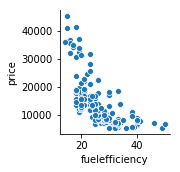

In [48]:
sns.pairplot(df_cars, x_vars=['fuelefficiency'], y_vars=dependent_var)

In [49]:
print('Correlation between price and fuelefficiency = ', np.corrcoef(df_cars.price, df_cars.fuelefficiency)[0,1])

Correlation between price and fuelefficiency =  -0.6886973748154854


In [50]:
ignored_x_features.append('citympg')
ignored_x_features.append('highwaympg')
print(ignored_x_features)

['carheight', 'citympg', 'highwaympg']


In [51]:
non_cat_vars.append('fuelefficiency')

In [52]:
# non_cat_vars

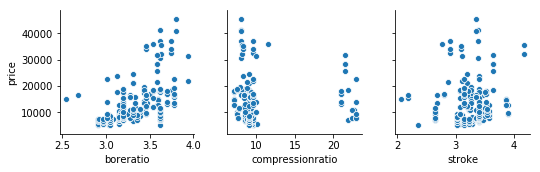

In [53]:
sns.pairplot(df_cars, x_vars=['boreratio', 'compressionratio','stroke'], y_vars=dependent_var)

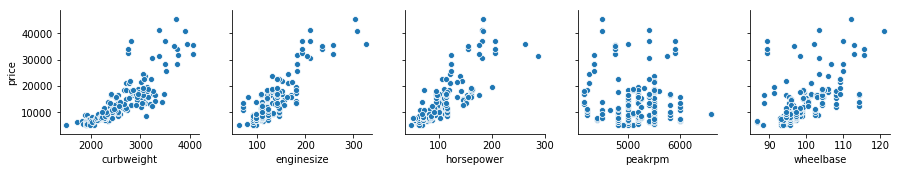

In [54]:
sns.pairplot(df_cars, x_vars=['curbweight', 'enginesize', 'horsepower', 'peakrpm', 'wheelbase'],y_vars=dependent_var)

In [55]:
# x = non_cat_vars
# y = dependent_var

# sns.pairplot(df_cars, x_vars=x, y_vars=y, aspect=1)
# plt.savefig('price-vs-others.png')

##### Inference
From the above two pairplots
- <b>boreratio, curbweight, enginesize, horsepower, wheelbase</b> appers positive corrleation and significant

- <b>compressionratio, stroke, peakrpm</b> appears non-sginificant

In [56]:
# ignored_x_features

In [57]:
non_cat_vars

['boreratio',
 'carheight',
 'carlength',
 'carwidth',
 'citympg',
 'compressionratio',
 'curbweight',
 'enginesize',
 'highwaympg',
 'horsepower',
 'peakrpm',
 'stroke',
 'wheelbase',
 'fuelefficiency']

In [58]:
ignored_x_features.append('compressionratio')
ignored_x_features.append('stroke')
ignored_x_features.append('peakrpm')

In [59]:
for val in ignored_x_features:
    print('correlation between price -',val,'is = ', round(np.corrcoef(df_cars[val],df_cars['price'])[0,1],2))

correlation between price - carheight is =  0.12
correlation between price - citympg is =  -0.69
correlation between price - highwaympg is =  -0.7
correlation between price - compressionratio is =  0.07
correlation between price - stroke is =  0.08
correlation between price - peakrpm is =  -0.09


In [60]:
list1 = [ele for ele in non_cat_vars if ele not in ignored_x_features]

In [61]:
list1.append('price')
print(list1)

['boreratio', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'wheelbase', 'fuelefficiency', 'price']


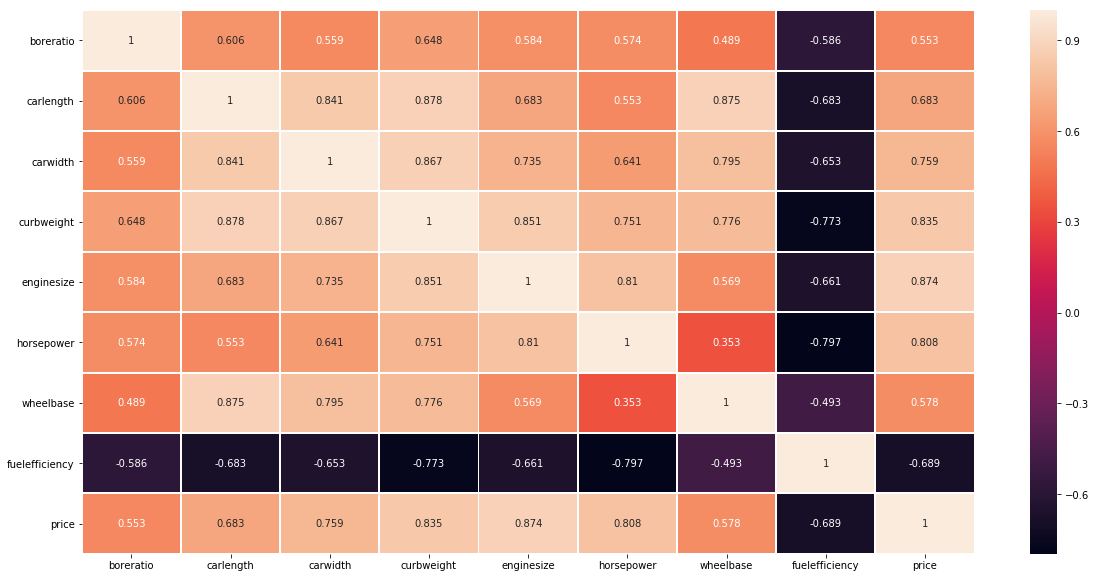

In [62]:
plt.figure(figsize = (20,10))  
# sns.heatmap(pd.DataFrame.round(df_cars.corr(), 3), annot=True,fmt='.2g',linewidths=1)
sns.heatmap(df_cars[list1].corr(), annot=True,fmt='.3g',linewidths=1)
# plt.savefig('heatmap-raw.png')

<b>From the correlation map, we observe there are no insignificant variables from the non_categorical_variables</b>

### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [63]:
print(cat_vars, len(cat_vars))

['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'] 11


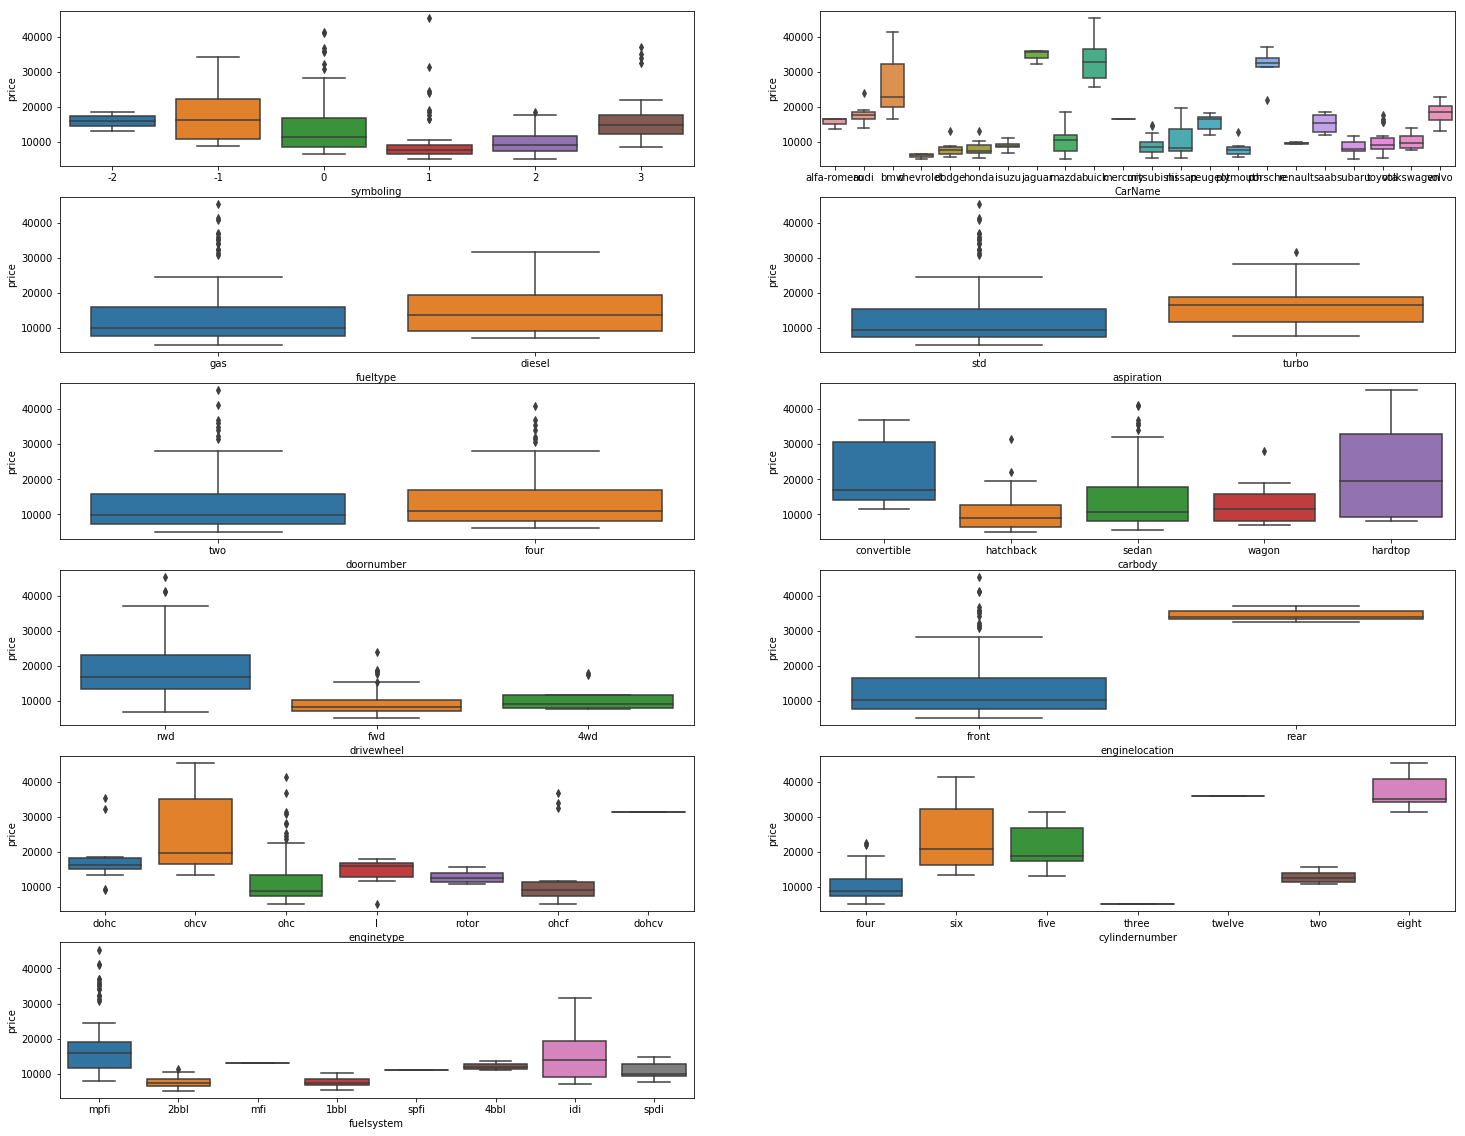

In [64]:
plt.figure(figsize=(25, 20))

for i in range(1,12):
    plt.subplot(6,2,i)
    sns.boxplot(x=cat_vars[i-1], y='price', data=df_cars)
# plt.tight_layout()


#### Lets observe each variable independenlty

In [65]:
cat_vars

['symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

##### CarName Vs Price
- how it can be bucketed

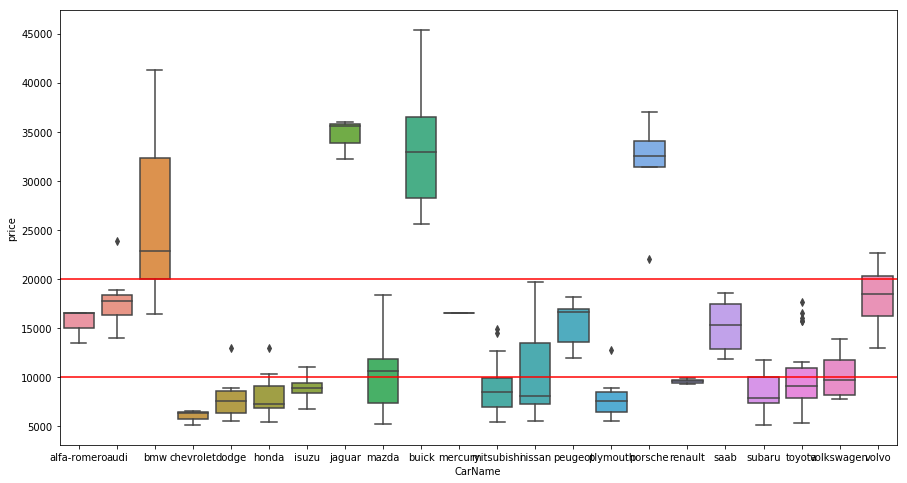

In [66]:
plt.figure(figsize=(15,8))
sns.boxplot(x='CarName', y='price', data=df_cars)
plt.axhline(y=20000, color='r', linestyle='-')
plt.axhline(y=10000, color='r', linestyle='-')

#### Derived variable from the carName
<b> From the above chart, we can make 3 categories as - high, medium, and low categories) </b>

- CarName (carmake)
- fueltype
- carbody

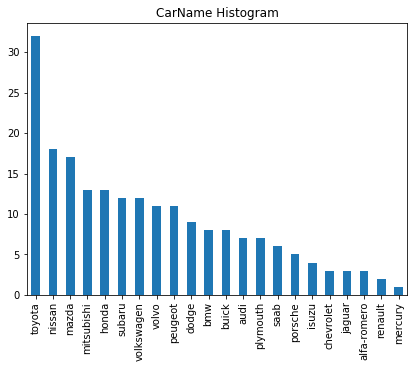

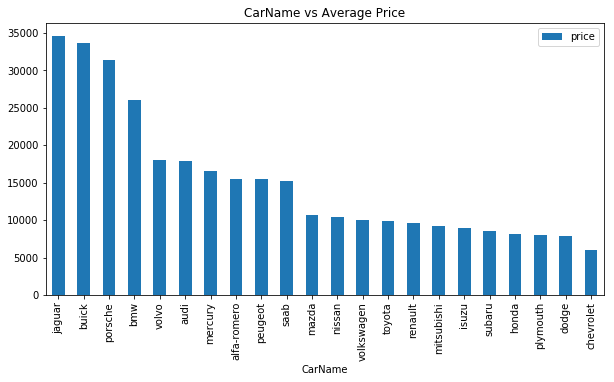

In [67]:
plt.figure(figsize=(17,5))

plt.subplot(1,2,1)
plt.title('CarName Histogram')
df_cars.CarName.value_counts().plot('bar', figsize=(15,5))
# sns.countplot(df_cars.CarName)

df_carname.plot.bar(figsize=(10,5))
plt.title('CarName vs Average Price')
plt.show()

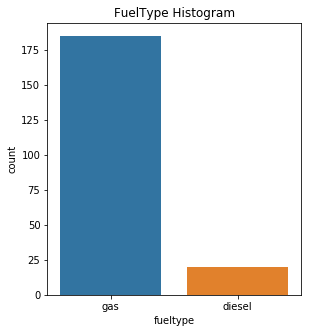

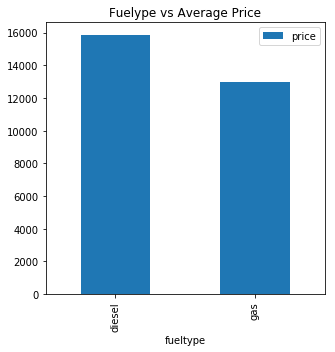

In [68]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('FuelType Histogram')
# df_cars.fueltype.value_counts().plot('bar', figsize=(5,5))
sns.countplot(df_cars.fueltype)

df_fueltype.plot.bar(figsize=(5,5))
plt.title('Fuelype vs Average Price')
plt.show()

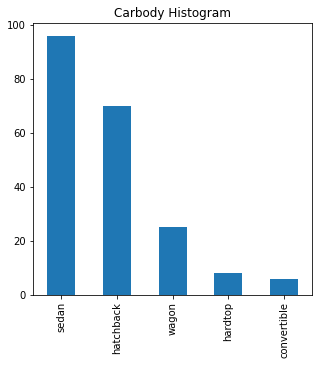

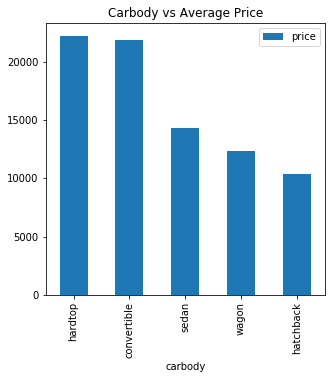

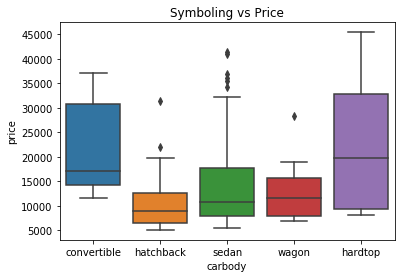

In [69]:
plt.figure(figsize=(10,5))

# plt.subplot(1,2,1)
plt.title('Carbody Histogram')
# sns.countplot(df_cars.carbody)
df_cars.carbody.value_counts().plot('bar', figsize=(5,5))

# plt.subplot(1,2,2)
df_carbody.plot.bar(figsize=(5,5))
plt.title('Carbody vs Average Price')
plt.show()

plt.title('Symboling vs Price')
sns.boxplot(x=df_cars.carbody, y=df_cars.price)
plt.show()

##### Inferences
- Toyota Manufactures more number of cars
- preferred fuel is Gas
- Preferred CarBody - Sedana and HatchBack


- jaguar, buick - has higher prices than rest of all the company manufacturers
- hardtop and convertible are priced higher
- hatchback is cheapest of all the carbody types

#### Analysing Symboling

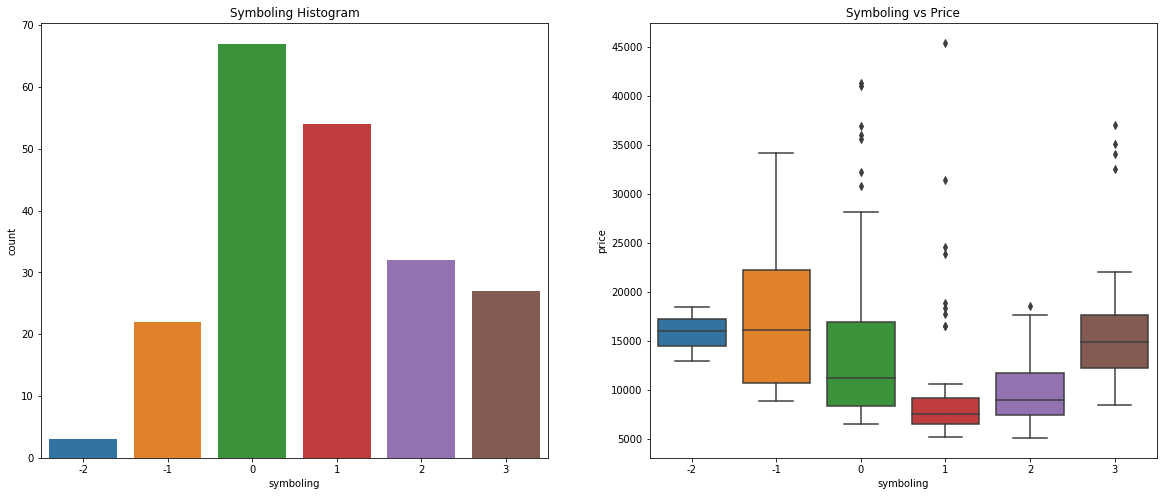

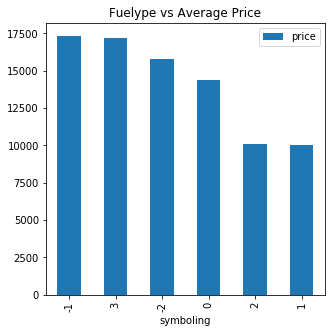

In [70]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(df_cars.symboling)

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df_cars.symboling, y=df_cars.price)

plt.show()

df_symboling.plot.bar(figsize=(5,5))
plt.title('Fuelype vs Average Price')
plt.show()



##### Inferences
    - '0' -> sells highest number of cars, Its mean price is also low
    - '1' and '2' are lowest priced

#### analysing Enginetype

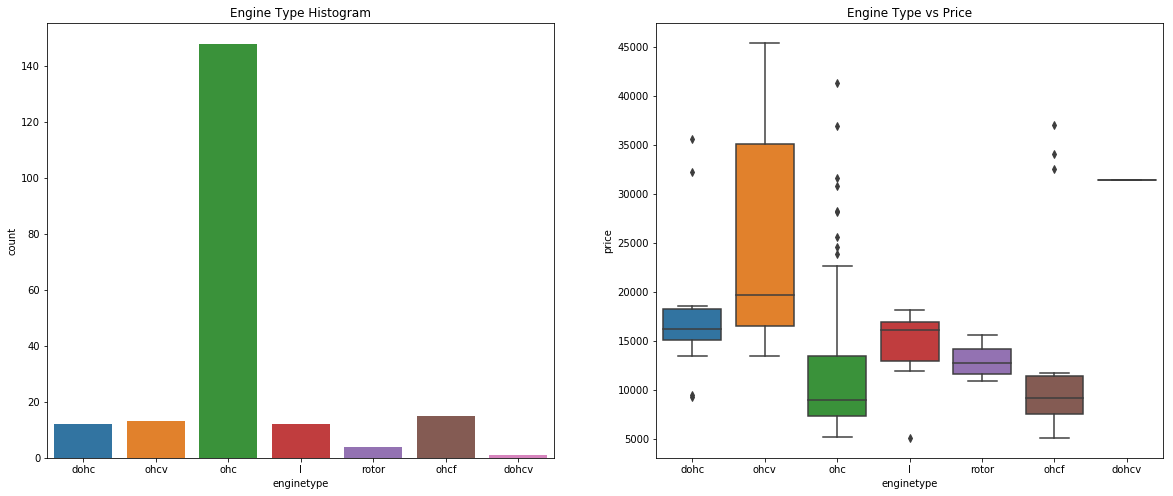

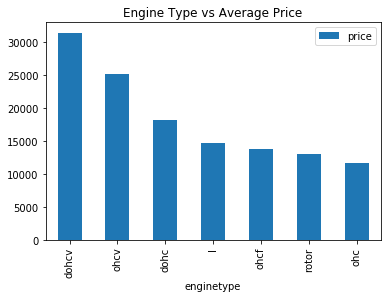

In [71]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(df_cars.enginetype)

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=df_cars.enginetype, y=df_cars.price)

plt.show()

# df_enginetype = pd.DataFrame(df_cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df_enginetype.plot.bar()
plt.title('Engine Type vs Average Price')
plt.show()

In [72]:
df_cars[df_cars['enginetype']=='dohcv'].shape

(1, 26)

##### Inferences
    - OHC is highest selling type
    - dohcv has hightest avg.price followed by ohcv (<b> but has only 1 data point </b>)

#### Analyzing Doornumber and Aspiration

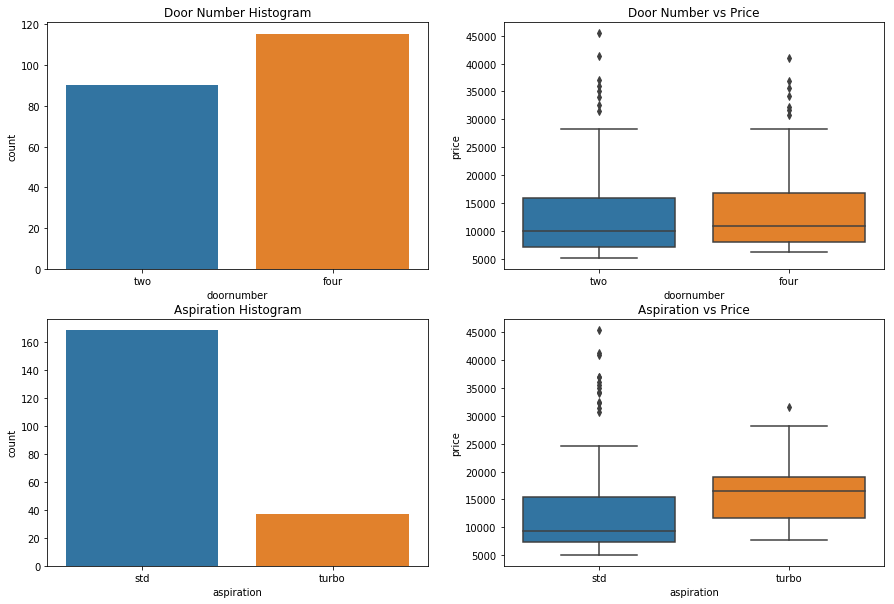

In [73]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('Door Number Histogram')
sns.countplot(df_cars.doornumber)

plt.subplot(2,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=df_cars.doornumber, y=df_cars.price)

plt.subplot(2,2,3)
plt.title('Aspiration Histogram')
sns.countplot(df_cars.aspiration)

plt.subplot(2,2,4)
plt.title('Aspiration vs Price')
sns.boxplot(x=df_cars.aspiration, y=df_cars.price)

plt.show()

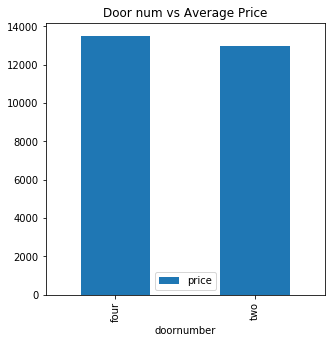

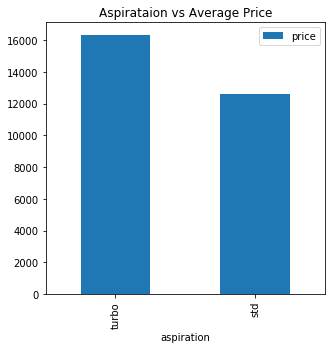

In [74]:
df_doornumber.plot.bar(figsize=(5,5))
plt.title('Door num vs Average Price')
plt.show()

df_aspiration.plot.bar(figsize=(5,5))
plt.title('Aspirataion vs Average Price')
plt.show()

##### Inference
- Door number appears no significane on pricing as both the means are very near

#### analyzing Engine location and num.of.mccylinder

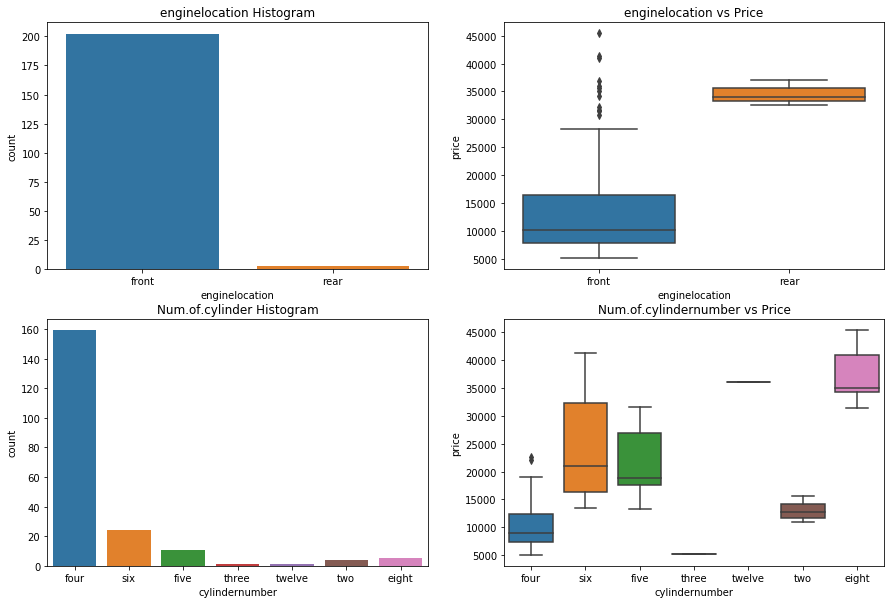

In [75]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('enginelocation Histogram')
sns.countplot(df_cars.enginelocation)

plt.subplot(2,2,2)
plt.title('enginelocation vs Price')
sns.boxplot(x=df_cars.enginelocation, y=df_cars.price)

plt.subplot(2,2,3)
plt.title('Num.of.cylinder Histogram')
sns.countplot(df_cars.cylindernumber)

plt.subplot(2,2,4)
plt.title('Num.of.cylindernumber vs Price')
sns.boxplot(x=df_cars.cylindernumber, y=df_cars.price)

plt.show()

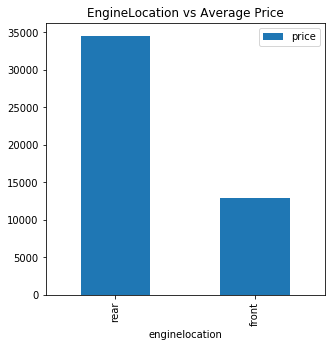

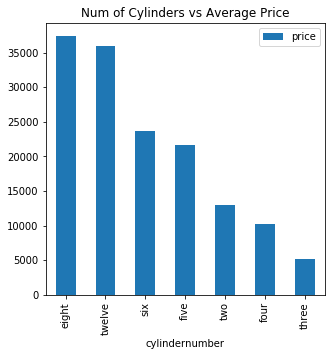

In [76]:
df_eng_loc.plot.bar(figsize=(5,5))
plt.title('EngineLocation vs Average Price')
plt.show()

df_cylinders.plot.bar(figsize=(5,5))
plt.title('Num of Cylinders vs Average Price')
plt.show()

##### Inferences
    - Engine location Front appears to be most favoured and the price difference is very significant except for some outliers
    - Four cylinder is most common
    - very few data points for (3,12,2,5 and 8 cylinder numbers)
    - cars with 8 cylinders are priced maximum
    - Cars with cylinders 3 and 12 are minimum and difficult to interpret

#### analyzing fuelsystem, drivewheel

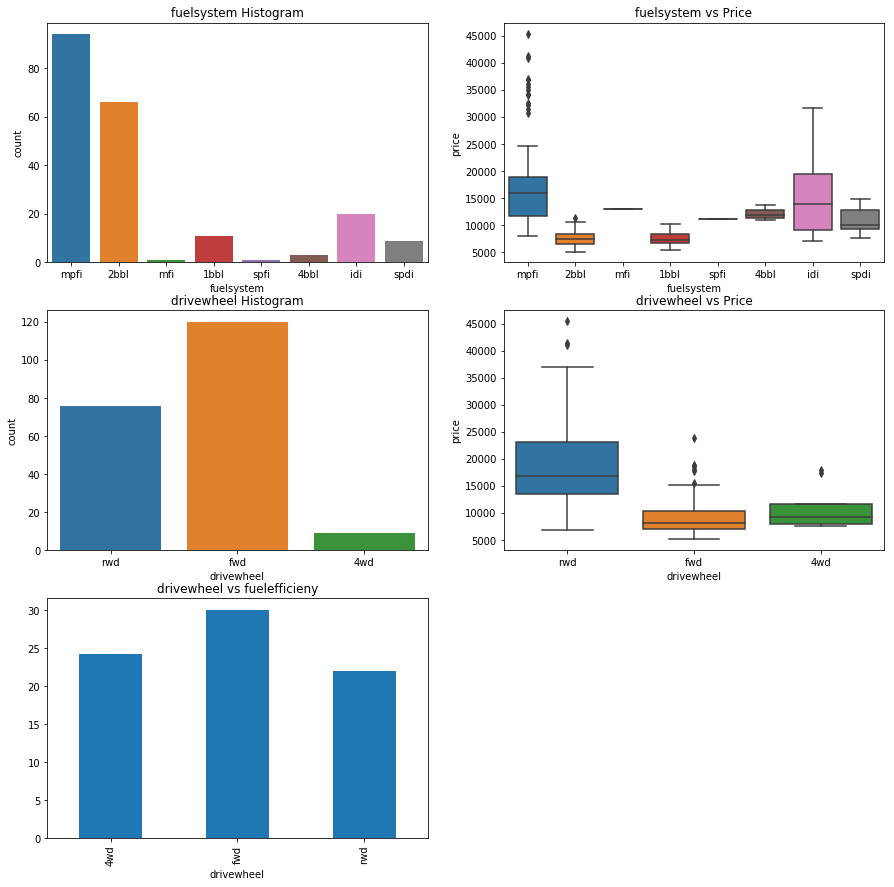

In [77]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.title('fuelsystem Histogram')
sns.countplot(df_cars.fuelsystem)

plt.subplot(3,2,2)
plt.title('fuelsystem vs Price')
sns.boxplot(x=df_cars.fuelsystem, y=df_cars.price)

plt.subplot(3,2,3)
plt.title('drivewheel Histogram')
sns.countplot(df_cars.drivewheel)

plt.subplot(3,2,4)
plt.title('drivewheel vs Price')
sns.boxplot(x=df_cars.drivewheel, y=df_cars.price)

plt.subplot(3,2,5)
plt.title('drivewheel vs fuelefficieny')
(df_cars.groupby(by=['drivewheel'])['fuelefficiency'].mean()).plot('bar')

plt.show()

##### Inferences - 
Fuel system
    - mpfi is widely sold ans its expensive of all (there are some outliers too)
    - 2bbl is sold next to mpfi and its less expensive
    - mfi and spfi => less data
Drivewheel
    - fwd is most favoured and less priced
    - rwd is expensive and stands 2nd in sales
    
- fwd are most fuel efficient, followed by 4wd and rwd
    

#### Converting the CarName to category

In [78]:
df_cars['price'] = df_cars['price'].astype(int)

In [79]:
bins = [0,10000,20000,45400]

In [80]:
# cars = df_cars

In [81]:
df_cars['binned'] = pd.cut(df_cars['price'], bins, labels=['low-price', 'med-price', 'high-price'])

In [82]:
df_cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fuelefficiency,binned
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495,23.0,med-price
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500,23.0,med-price
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500,21.0,med-price
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950,26.0,med-price
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450,19.0,med-price


In [83]:
df_cars['binned'].value_counts()

low-price     100
med-price      79
high-price     26
Name: binned, dtype: int64

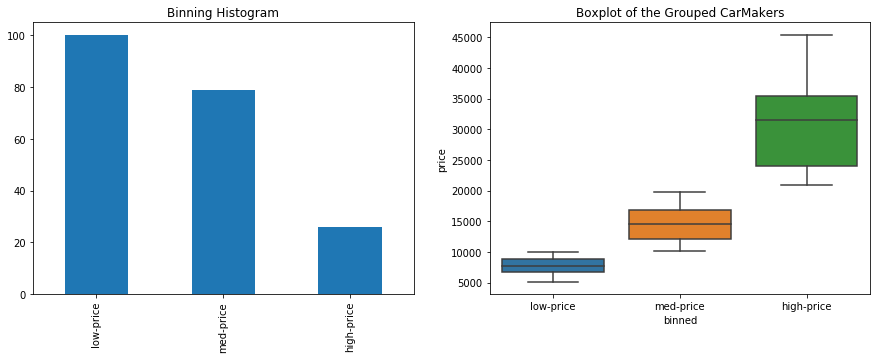

In [84]:
plt.figure(figsize=(17,5))

plt.subplot(1,2,1)
plt.title('Binning Histogram')
df_cars.binned.value_counts().plot('bar', figsize=(15,5))

plt.subplot(1,2,2)
plt.title('Boxplot of the Grouped CarMakers')
sns.boxplot(x=df_cars.binned, y=df_cars.price)

##### Inference
- After binning, we can clearly observe the avg price difference between the grouped categories
- so, we can ignore <b>CarName</b>

### 3. Data Cleanup  
    - Dealing with Categorical Variables
    

In [85]:
# df_cars.to_csv('cars.csv')

In [86]:
print(non_cat_vars)

['boreratio', 'carheight', 'carlength', 'carwidth', 'citympg', 'compressionratio', 'curbweight', 'enginesize', 'highwaympg', 'horsepower', 'peakrpm', 'stroke', 'wheelbase', 'fuelefficiency']


In [87]:
print(ignored_x_features)

['carheight', 'citympg', 'highwaympg', 'compressionratio', 'stroke', 'peakrpm']


In [88]:
feature_list = [ele for ele in non_cat_vars if ele not in ignored_x_features]

In [89]:
print(feature_list)

['boreratio', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'wheelbase', 'fuelefficiency']


In [90]:
print(cat_vars)

['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


<b> Add binned from the derived variable </b>

In [91]:
cat_vars.append('binned')
print(cat_vars)

['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'binned']


#### Refined X features

In [92]:
ignored_x_cat_features =  ['CarName','doornumber','fuelsystem']
# CarName -> Car Manufactures are categorised in to binned
# door number -> very little mean-price difference
# fuelsystem -> only mpfi is widely used rest all are very less used will not add any significane to the data model

In [93]:
feature_list_cat =  [ele for ele in cat_vars if ele not in ignored_x_cat_features]
print(feature_list_cat)

['symboling', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'binned']


In [94]:
final_feature_list = feature_list + feature_list_cat

In [95]:
final_feature_list.append('price')

In [96]:
print(len(final_feature_list), final_feature_list)

18 ['boreratio', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'wheelbase', 'fuelefficiency', 'symboling', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'binned', 'price']


<b> Removed attributes from the dataframe </b>

In [97]:
print(set(df_cars.columns).difference(set(final_feature_list)))

{'fuelsystem', 'CarName', 'highwaympg', 'doornumber', 'citympg', 'stroke', 'peakrpm', 'carheight', 'compressionratio'}


In [98]:
final_feature_list = list(set(final_feature_list))

#### Final feature list after Exploratory Data Analysis for both Categorical and Non-Categorical(Numeric) Variables

In [99]:
print(len(final_feature_list), type(final_feature_list), final_feature_list)

18 <class 'list'> ['enginetype', 'symboling', 'carwidth', 'fueltype', 'enginelocation', 'binned', 'drivewheel', 'price', 'horsepower', 'fuelefficiency', 'carbody', 'cylindernumber', 'wheelbase', 'curbweight', 'aspiration', 'carlength', 'enginesize', 'boreratio']


#### Final Categorical List

In [100]:
print(feature_list_cat, len(feature_list_cat))

['symboling', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'binned'] 9


#### Final Non-Categorical List

In [101]:
feature_list = list(set(feature_list))
print(feature_list, len(feature_list))

['carwidth', 'horsepower', 'fuelefficiency', 'wheelbase', 'curbweight', 'carlength', 'enginesize', 'boreratio'] 8


In [102]:
print(dependent_var)

['price']


In [103]:
# df_cars.to_csv('cars_b4_dummies.csv')

#### Subset the dataframe with final feature columns

In [104]:
df_model = df_cars[final_feature_list]

In [105]:
df_model.shape

(205, 18)

In [106]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
enginetype        205 non-null object
symboling         205 non-null int64
carwidth          205 non-null float64
fueltype          205 non-null object
enginelocation    205 non-null object
binned            205 non-null category
drivewheel        205 non-null object
price             205 non-null int32
horsepower        205 non-null int64
fuelefficiency    205 non-null float64
carbody           205 non-null object
cylindernumber    205 non-null object
wheelbase         205 non-null float64
curbweight        205 non-null int64
aspiration        205 non-null object
carlength         205 non-null float64
enginesize        205 non-null int64
boreratio         205 non-null float64
dtypes: category(1), float64(5), int32(1), int64(4), object(7)
memory usage: 26.8+ KB


In [107]:
df_model.describe()

,symboling,carwidth,price,horsepower,fuelefficiency,wheelbase,curbweight,carlength,enginesize,boreratio
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,13276.702439,104.117073,26.834146,98.756585,2555.565854,174.049268,126.907317,3.329756
std,1.245307,2.145204,7988.848977,39.544167,6.651832,6.021776,520.680204,12.337289,41.642693,0.270844
min,-2.000000,60.300000,5118.000000,48.000000,14.000000,86.600000,1488.000000,141.100000,61.000000,2.540000
25%,0.000000,64.100000,7788.000000,70.000000,21.000000,94.500000,2145.000000,166.300000,97.000000,3.150000
50%,1.000000,65.500000,10295.000000,95.000000,26.000000,97.000000,2414.000000,173.200000,120.000000,3.310000
75%,2.000000,66.900000,16503.000000,116.000000,31.000000,102.400000,2935.000000,183.100000,141.000000,3.580000
max,3.000000,72.300000,45400.000000,288.000000,50.000000,120.900000,4066.000000,208.100000,326.000000,3.940000


In [108]:
df_model.columns

Index(['enginetype', 'symboling', 'carwidth', 'fueltype', 'enginelocation',
       'binned', 'drivewheel', 'price', 'horsepower', 'fuelefficiency',
       'carbody', 'cylindernumber', 'wheelbase', 'curbweight', 'aspiration',
       'carlength', 'enginesize', 'boreratio'],
      dtype='object')

In [109]:
feature_list_cat

['symboling',
 'fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'binned']

#### Creating dummy variables

Left of categorical variables shall be converted by means of pandas::get_dummies
 - 'aspiration',
 - 'binned',
 - 'symboling',
 - 'carbody',
 - 'drivewheel',
 - 'enginelocation',
 - 'fueltype',
 - 'enginetype',
 - 'cylindernumber'
        
No Need to create individual dummy variables.

In [110]:
df_model = pd.get_dummies(df_model, columns=feature_list_cat, drop_first=True)

In [111]:
df_model.shape

(205, 37)

In [112]:
# df_model.info()

In [113]:
print(df_model.columns, len(df_model.columns))

Index(['carwidth', 'price', 'horsepower', 'fuelefficiency', 'wheelbase',
       'curbweight', 'carlength', 'enginesize', 'boreratio', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'binned_med-price', 'binned_high-price'],
      dtype='object') 37


In [114]:
# df_model.to_csv('car_dummies.csv')

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [115]:
# set random seed as 0 for consistency
np.random.seed(0)

In [116]:
df_train, df_test = train_test_split(df_model, train_size = 0.7, test_size = 0.3, random_state = 100)

##### lets check the train and test data

In [117]:
print(df_train.shape)
print(df_test.shape)

(143, 37)
(62, 37)


#### Rescaling the features

In [118]:
scaler = MinMaxScaler()

In [119]:
# print(df_model.columns)

In [120]:
print(len(feature_list), feature_list)

8 ['carwidth', 'horsepower', 'fuelefficiency', 'wheelbase', 'curbweight', 'carlength', 'enginesize', 'boreratio']


In [121]:
scaler_variables = ['carlength',
 'curbweight',
 'boreratio',
 'fuelefficiency',
 'enginesize',
 'carwidth',
 'wheelbase',
 'horsepower','price']

In [122]:
print(scaler_variables, len(scaler_variables))

['carlength', 'curbweight', 'boreratio', 'fuelefficiency', 'enginesize', 'carwidth', 'wheelbase', 'horsepower', 'price'] 9


In [123]:
df_train[scaler_variables] = scaler.fit_transform(df_train[scaler_variables])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [124]:
df_train.head()

,carwidth,price,horsepower,fuelefficiency,wheelbase,curbweight,carlength,enginesize,boreratio,symboling_-1,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,binned_med-price,binned_high-price
122,0.291667,0.068818,0.083333,0.527778,0.244828,0.272692,0.426016,0.139623,0.230159,0,...,0,0,0,1,0,0,0,0,0,0
125,0.666667,0.466890,0.395833,0.194444,0.272414,0.500388,0.452033,0.339623,1.000000,0,...,0,0,0,1,0,0,0,0,0,1
166,0.308333,0.122110,0.266667,0.361111,0.272414,0.314973,0.448780,0.139623,0.444444,0,...,0,0,0,1,0,0,0,0,0,0
1,0.316667,0.314446,0.262500,0.250000,0.068966,0.411171,0.450407,0.260377,0.626984,0,...,0,0,0,1,0,0,0,0,1,0
199,0.575000,0.382131,0.475000,0.111111,0.610345,0.647401,0.775610,0.260377,0.746032,1,...,0,0,0,1,0,0,0,0,1,0


In [125]:
df_train.describe()

,carwidth,price,horsepower,fuelefficiency,wheelbase,curbweight,carlength,enginesize,boreratio,symboling_-1,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,binned_med-price,binned_high-price
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.461655,0.219309,0.227302,0.361111,0.411141,0.407878,0.525476,0.241351,0.497946,0.090909,...,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.363636,0.139860
std,0.184517,0.215682,0.165511,0.188485,0.205581,0.211269,0.204848,0.154619,0.207140,0.288490,...,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.482737,0.348061
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.304167,0.067298,0.091667,0.194444,0.272414,0.245539,0.399187,0.135849,0.305556,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.425000,0.140343,0.191667,0.361111,0.341379,0.355702,0.502439,0.184906,0.500000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.550000,0.313479,0.283333,0.513889,0.503448,0.559542,0.669919,0.301887,0.682540,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [126]:
# plt.figure(figsize = (30, 25))
# sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu", fmt=".2g" )
# plt.show()

##### Dividing into X and Y sets for the model building

In [127]:
y_train = df_train.pop('price')
X_train = df_train

In [128]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [129]:
print(lm.coef_)
print(lm.intercept_)
print(lm.get_params())

[ 1.73211037e-02  8.65671709e-01  1.60151820e-01  1.77205187e-01
  1.80892001e-01  4.67151255e-02  4.91739221e-02 -6.22268929e-02
  1.47167400e-02  7.95599457e-02  8.21942025e-02  9.79369767e-02
  4.50373521e-02 -6.76100677e-02 -4.83015781e-02 -2.15964230e-01
 -1.66119456e-01 -1.56536222e-01 -1.64308583e-01 -3.24463378e-02
 -7.47464897e-06  1.98290297e-01 -4.44698727e-01 -1.03153164e-03
  7.34586769e-02  6.31449404e-02 -9.25639707e-03  2.45896963e-02
 -1.06291560e-01 -8.94152335e-02 -1.45235868e-01  3.39936838e-02
 -3.10090026e-01  2.45896963e-02  1.70571664e-02  2.37510034e-01]
-0.019154813009770094
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


In [130]:
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [131]:
# Printing the boolean results
rfe.support_

array([False,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
        True, False, False,  True,  True, False, False, False, False,
        True, False, False,  True, False,  True, False, False,  True])

In [132]:
rfe.ranking_

array([19,  1,  1,  1,  1, 13, 16, 11, 18,  5,  4,  3, 12,  1,  2,  1,  1,
        1,  1, 14, 22,  1,  1, 21,  8,  9, 20,  1,  7,  6,  1, 10,  1, 15,
       17,  1])

#### Columsn which are retained

In [133]:
X_train.columns[rfe.support_]

Index(['horsepower', 'fuelefficiency', 'wheelbase', 'curbweight',
       'fueltype_gas', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_rotor', 'cylindernumber_six', 'cylindernumber_twelve',
       'binned_high-price'],
      dtype='object')

In [134]:
#variables that are to be dropped
X_train.columns
col = X_train.columns[~rfe.support_]
col

Index(['carwidth', 'carlength', 'enginesize', 'boreratio', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'aspiration_turbo', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_two', 'binned_med-price'],
      dtype='object')

#### Iteration - 1

In [135]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

y_train_rfe = y_train

In [136]:
X_train_new = train_model(X_train_rfe, y_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     133.6
Date:                Mon, 13 May 2019   Prob (F-statistic):           4.67e-70
Time:                        19:51:57   Log-Likelihood:                 218.57
No. Observations:                 143   AIC:                            -405.1
Df Residuals:                     127   BIC:                            -357.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

##### Elimation of insignificant variables
- all p-values are less than 0.05
- VIF < 5

From the above Iteration, the max p-value is 0.053, which is <b>'fueltype_gas'</b>

#### Iteration - 2
 - fueltype_gas

In [137]:
X_train_new = X_train_new.drop(labels=['fueltype_gas'], axis=1)

In [138]:
X_train_new = train_model(X_train_new, y_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     144.0
Date:                Mon, 13 May 2019   Prob (F-statistic):           4.14e-71
Time:                        19:51:57   Log-Likelihood:                 218.48
No. Observations:                 143   AIC:                            -407.0
Df Residuals:                     128   BIC:                            -362.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.07

- lets drop <b>cylindernumber_six</b>

#### Iteration - 3
    - cylindernumber_six

In [139]:
X_train_new = X_train_new.drop(labels=['cylindernumber_six'], axis=1)

In [140]:
X_train_new = train_model(X_train_new, y_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     151.7
Date:                Mon, 13 May 2019   Prob (F-statistic):           2.02e-71
Time:                        19:51:57   Log-Likelihood:                 216.44
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     129   BIC:                            -363.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

#### Iteration - 4
    - cylindernumber_twelve

In [141]:
X_train_new = X_train_new.drop(labels=['cylindernumber_twelve'], axis=1)
X_train_new = train_model(X_train_new, y_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     163.5
Date:                Mon, 13 May 2019   Prob (F-statistic):           3.25e-72
Time:                        19:51:57   Log-Likelihood:                 215.61
No. Observations:                 143   AIC:                            -405.2
Df Residuals:                     130   BIC:                            -366.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0385    

#### All the p-values are under the limit(0.05), lets calculate VIF

In [142]:
calculate_VIF(X_train_new)

,Features,VIF
0,const,80.94
7,carbody_sedan,13.28
6,carbody_hatchback,11.70
4,curbweight,11.31
1,horsepower,7.67
8,carbody_wagon,6.35
3,wheelbase,5.67
2,fuelefficiency,4.20
5,carbody_hardtop,2.49
12,binned_high-price,1.92


#### carbody_sedan has high VIF value, lets remove

#### Iteration - 5
- carbody_sedan

In [143]:
X_train_new = X_train_new.drop(labels=['carbody_sedan'], axis=1)

In [144]:
X_train_new = train_model(X_train_new, y_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     161.7
Date:                Mon, 13 May 2019   Prob (F-statistic):           1.52e-70
Time:                        19:51:57   Log-Likelihood:                 208.52
No. Observations:                 143   AIC:                            -393.0
Df Residuals:                     131   BIC:                            -357.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1225    

#### Iteration - 6
- wheelbase

In [145]:
X_train_new = X_train_new.drop(labels=['wheelbase'], axis=1)

In [146]:
X_train_new = train_model(X_train_new, y_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     179.1
Date:                Mon, 13 May 2019   Prob (F-statistic):           1.15e-71
Time:                        19:51:57   Log-Likelihood:                 208.47
No. Observations:                 143   AIC:                            -394.9
Df Residuals:                     132   BIC:                            -362.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1201    

#### Iteration - 7
carbody_hardtop

In [147]:
X_train_new = X_train_new.drop(labels=['carbody_hardtop'], axis=1)

In [148]:
X_train_new = train_model(X_train_new, y_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     199.9
Date:                Mon, 13 May 2019   Prob (F-statistic):           9.53e-73
Time:                        19:51:57   Log-Likelihood:                 208.27
No. Observations:                 143   AIC:                            -396.5
Df Residuals:                     133   BIC:                            -366.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1206    

#### Iteration - 8
- enginetype_dohcv

In [149]:
X_train_new = X_train_new.drop(labels=['enginetype_dohcv'], axis=1)

In [150]:
X_train_new = train_model(X_train_new, y_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     220.7
Date:                Mon, 13 May 2019   Prob (F-statistic):           3.07e-73
Time:                        19:51:57   Log-Likelihood:                 206.54
No. Observations:                 143   AIC:                            -395.1
Df Residuals:                     134   BIC:                            -368.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1024    

#### Iteration - 9
- fuelefficiency

In [151]:
X_train_new = X_train_new.drop(labels=['fuelefficiency'], axis=1)

In [152]:
X_train_new = train_model(X_train_new, y_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     249.1
Date:                Mon, 13 May 2019   Prob (F-statistic):           6.44e-74
Time:                        19:51:57   Log-Likelihood:                 205.22
No. Observations:                 143   AIC:                            -394.4
Df Residuals:                     135   BIC:                            -370.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0516    

In [153]:
calculate_VIF(X_train_new)

,Features,VIF
0,const,7.86
2,curbweight,3.66
1,horsepower,3.09
7,binned_high-price,1.83
3,carbody_hatchback,1.35
4,carbody_wagon,1.21
5,enginelocation_rear,1.17
6,enginetype_rotor,1.06


#### After Iteration - 9, we can observe all the p-values and VIF values are under check, so we can safely assume we found the independent variables

<b>
 
- curbweight
    
- horsepower

- binned_high-price

- carbody_hatchback

- carbody_wagon

- enginelocation_rear

- enginetype_rotor

</b>

In [154]:
# X_train_new.columns

### Residual Analysis of the model

In [155]:
lm = sm.OLS(y_train, X_train_new).fit()

In [156]:
y_predict = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

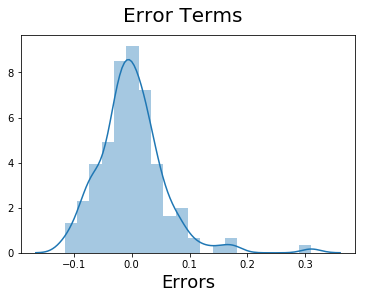

In [157]:
fig = plt.figure()
sns.distplot((y_train - y_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)   

 - From the Error graph we can observe the errors follows normal distribution except at the end, so the assumption of linear modelling is satisfied

### Prediction and Evaluation

In [158]:
# Scaling the df_test
df_test[scaler_variables] = scaler.fit_transform(df_test[scaler_variables])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [159]:
y_test = df_test.pop('price')
X_test = df_test

In [160]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1) ## Need to remove as its not required
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [161]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

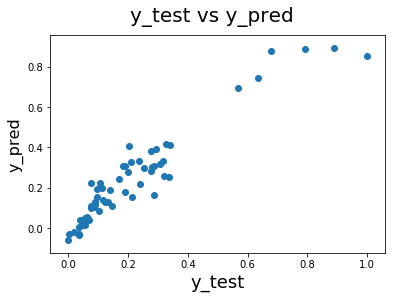

In [162]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [163]:
r2_score(y_test, y_pred)

0.8675439715456913

In [164]:
mean_absolute_error(y_test, y_pred)

0.05888833530356506

In [165]:
explained_variance_score(y_test, y_pred)

0.8824310575340655

In [166]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     249.1
Date:                Mon, 13 May 2019   Prob (F-statistic):           6.44e-74
Time:                        19:51:58   Log-Likelihood:                 205.22
No. Observations:                 143   AIC:                            -394.4
Df Residuals:                     135   BIC:                            -370.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0516      0.014     -3.710      0.000      -0.079      -0.024
horsepower              0.2885      0.053      5.461      0.000       0.184       0.393
curbweight              0.4468      0.045      9.918      0.000       0.358       0.536
carbody_hatchback      -0.0269      0.012     -2.211      0.029      -0.051      -0.003
carbody_wagon          -0.0455      0.016     -2.836      0.005      -0.077      -0.014
enginelocation_rear     0.1873      0.064      2.907      0.004       0.060       0.315
enginetype_rotor        0.0628      0.031      2.026      0.045       0.001       0.124
binned_high-price       0.2521      0.019     13.047      0.000       0.214       0.290
==============================================================================
Omnibus:                       56.553   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.979
Skew:                           1.402   Prob(JB):                     1.40e-49
Kurtosis:                       8.468   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Final Inference

1. R-Square and Adjusted R-Square explains the fit of the model, which is 92.8% and 92.4%; which is good
2. Prob (F-statistic) = 6.44e-74, which is approximately 0(zero) confirmns once again the derived model is significant and Variance(R-Quare and Adjusted-R-Square is not by chance)
3. p-values of all the coefficients is less than 0.05, implies all the significant